In [21]:
import pandas as pd
import numpy as np

import seaborn as sbn
import matplotlib.pyplot as plt

In [22]:
from keras.utils import to_categorical
from keras.datasets import fashion_mnist
from keras.models import load_model

In [23]:
from sklearn.metrics import confusion_matrix

In [24]:
(_,_),(x_test,y_test)=fashion_mnist.load_data()

In [25]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

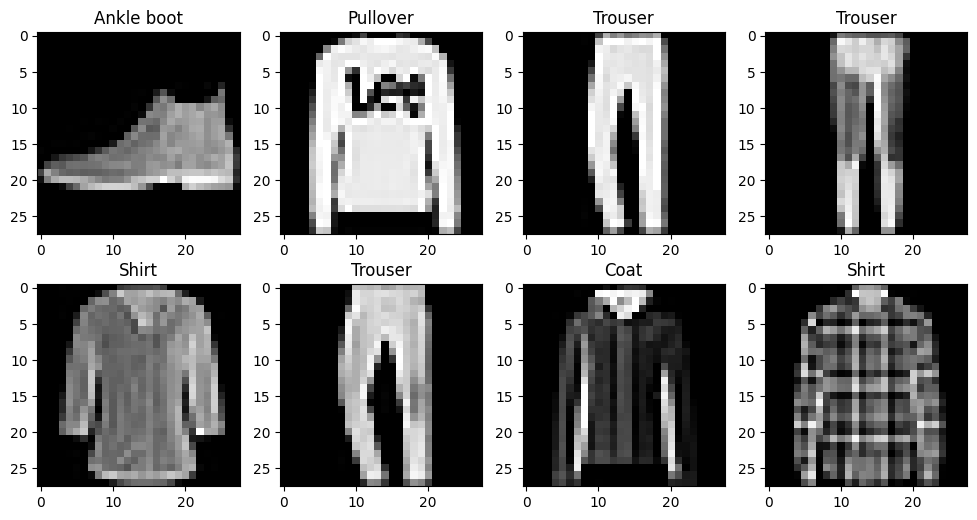

In [26]:
plt.figure(figsize=(12,6))
for i in range(8):
    plt.subplot(2,4,i+1)
    plt.imshow(x_test[i],cmap="gray")
    plt.title(class_names[y_test[i]])
plt.show()

In [27]:
input_shape = (28, 28, 1)

# Scale images to the [0, 1] range
x_test = x_test.astype("float32") / 255

# Make sure images have shape (28, 28, 1)
x_test = np.expand_dims(x_test, -1)

print("x_train shape:", x_test.shape)
print(x_test.shape[0], "train samples")

x_train shape: (10000, 28, 28, 1)
10000 train samples


In [28]:
# convert class vectors to binary class matrices
y_test = to_categorical(y_test, 10)

In [29]:
model=load_model("model.h5")

In [30]:
y_pred = model.predict(x_test)

313/313 [==============================] - 2s 5ms/step


In [31]:
y_pred_df=pd.DataFrame(y_pred,columns=class_names)
y_test_df=pd.DataFrame(y_test,columns=class_names)

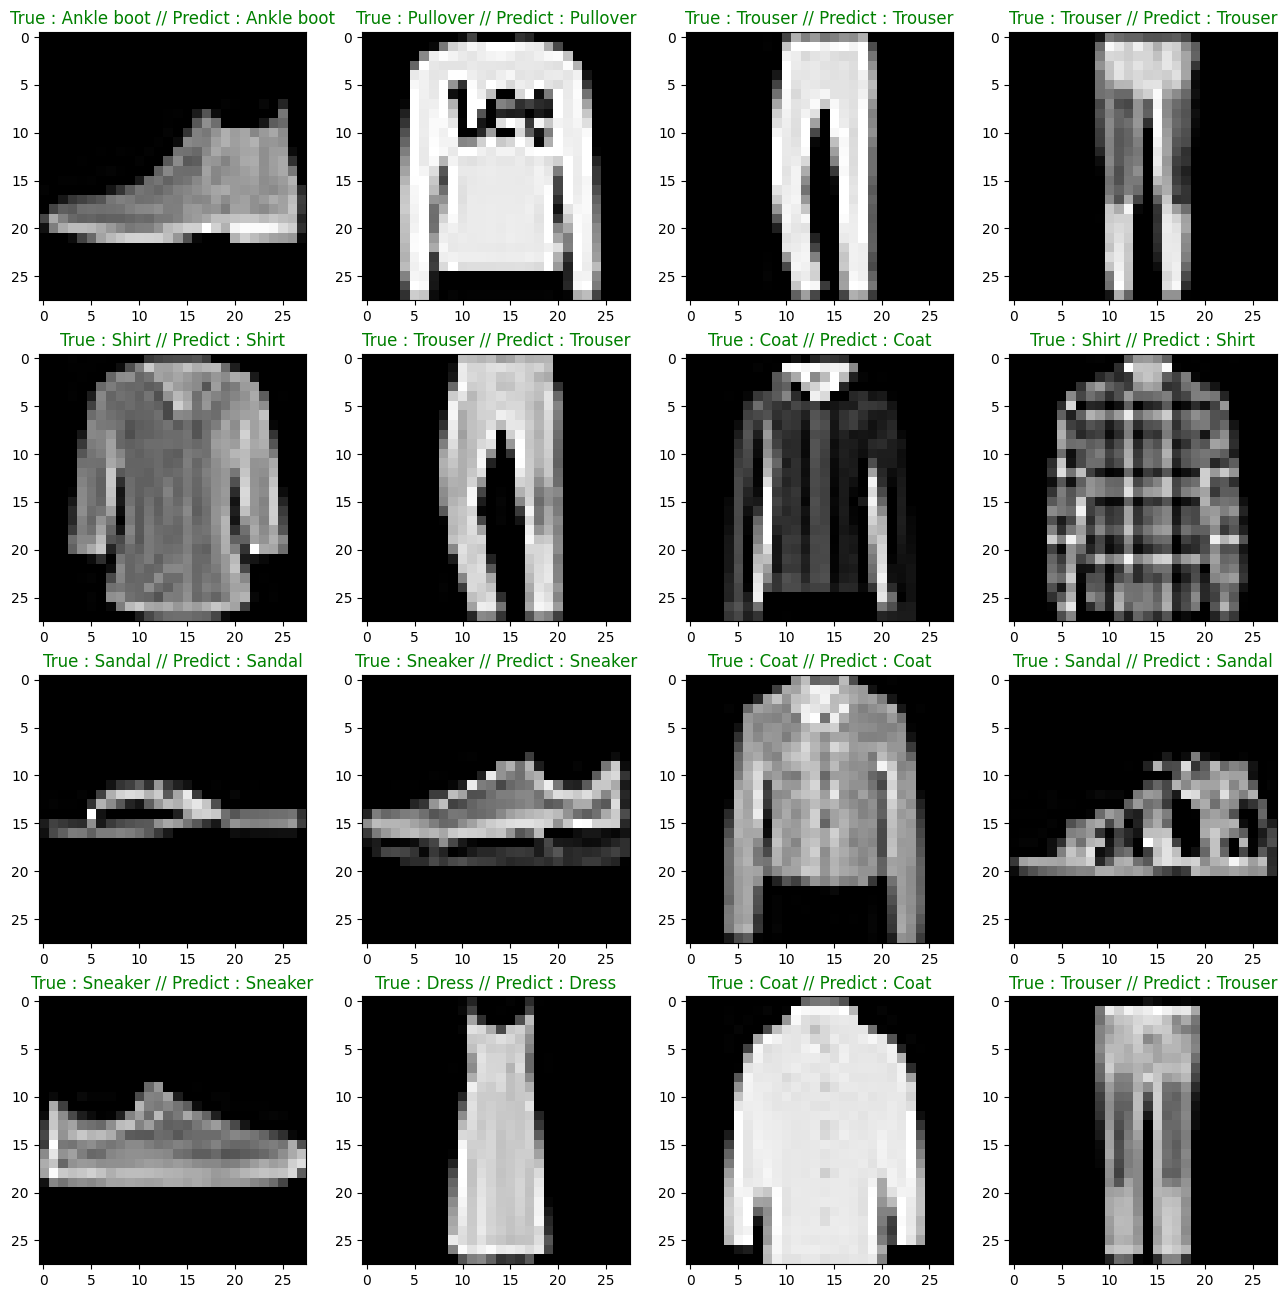

In [33]:
plt.figure(figsize=(16,16))
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.imshow(x_test[i],cmap="gray")
    title="True : "+str(y_test_df.iloc[i].idxmax())+" // Predict : "+str(y_pred_df.iloc[i].idxmax())
    font={'color':'green'}
    if(y_test_df.iloc[i].idxmax()!=y_pred_df.iloc[i].idxmax()):
        font={'color':'red'}
    plt.title(title,fontdict=font)
plt.show()

In [34]:
true=y_test_df.idxmax(axis=1)
pred=y_pred_df.idxmax(axis=1)

In [35]:
confusion_matrix(true,pred)

array([[963,   0,   0,   0,   0,   4,   1,  32,   0,   0],
       [  0, 982,   4,   3,   2,   3,   3,   2,   1,   0],
       [  0,   1, 903,  22,  22,   0,  52,   0,   0,   0],
       [  0,   2,  24, 933,   7,   0,  19,   0,  12,   3],
       [  0,   1,  59,  12, 859,   0,  58,   0,  11,   0],
       [  6,   0,   0,   0,   0, 981,   0,  13,   0,   0],
       [  0,  10,  87,  27,  55,   0, 708,   0, 112,   1],
       [ 13,   0,   0,   0,   0,   7,   0, 980,   0,   0],
       [  0,   8,   2,  19,  18,   1, 104,   0, 848,   0],
       [  0,   2,   2,  14,   0,   0,   3,   0,   1, 978]], dtype=int64)

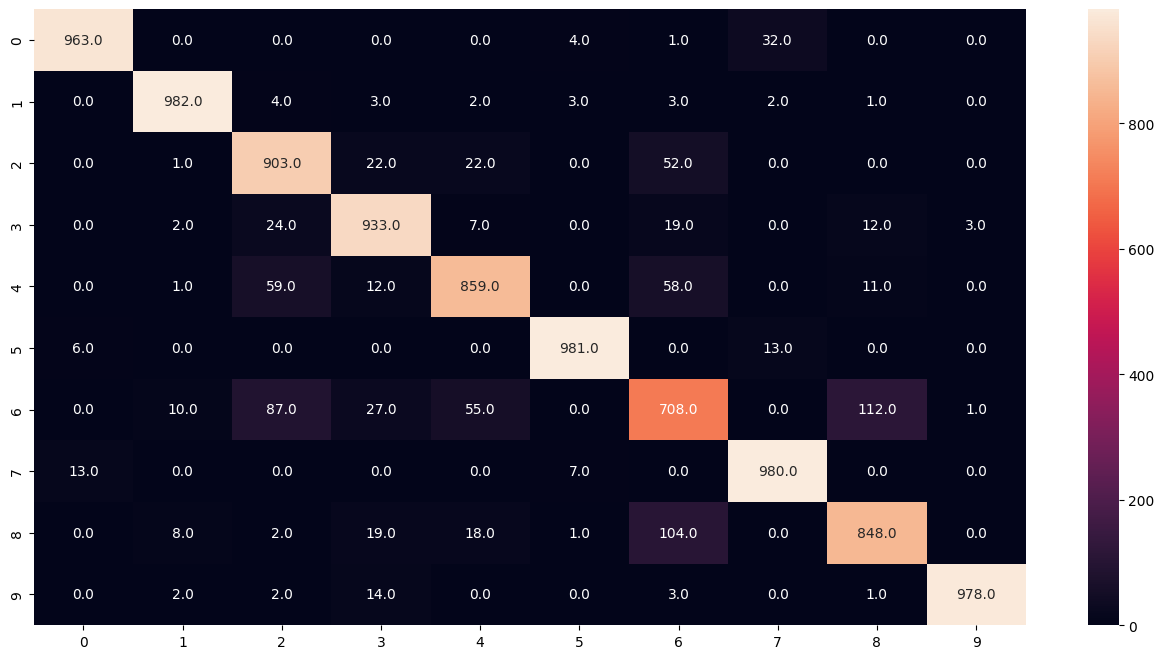

In [36]:
plt.figure(figsize=(16,8))
sbn.heatmap(confusion_matrix(true,pred),annot=True,fmt=".1f")
plt.show()